In [78]:
import pickle
import os
import pandas as pd
import pprint

In [81]:
from cube_fil_finder.galfa.galfa_v_lookup import GALFA_V_LOOKUP_W

In [12]:
from cube_fil_finder.galfa import galfa_const

In [11]:
data_file_dir = '/Users/larryli/Documents/CC/16-17/research/3d_filfind/data_out'
fourth_batch_from_mary_path = os.path.join(data_file_dir, 'fourth_batch_all_prop_new_withunits_check.csv')

In [27]:
data_df = pd.read_csv(fourth_batch_from_mary_path)

In [3]:
base_dir = '/Users/larryli/Documents/CC/16-17/research/3d_filfind/pickled_dicts/fourth_batch/'
p_file = os.path.join(base_dir, 'all_trees_1_8.p')

In [4]:
all_trees_dict = pickle.load(open(p_file, 'rb'))

In [36]:
tree_keys_that_count = set(data_df['id'])

In [89]:
near_edge_trees = {}

In [90]:
for k, v in all_trees_dict.items():
    if k not in tree_keys_that_count:
        continue
    corner_original = v.root_node.corners_original
    m_min = min(corner_original[0][0], galfa_const.GALFA_Y_STEPS - corner_original[1][0])
    n_min = min(corner_original[0][1], galfa_const.GALFA_X_STEPS - corner_original[1][1])
    min_min = min(m_min, n_min)
    if min_min > 80 and min_min < 90:
        near_edge_trees[k] = (m_min, n_min, corner_original,
                              [(i, '{:.1f}kms'.format(GALFA_V_LOOKUP_W[i])) for i in v.root_node.v_slice_index])

In [91]:
pprint.pprint(near_edge_trees)

{'1020_1032_2': (88,
                 624,
                 [[2318, 20818], [2344, 20976]],
                 [(1032, '6.3kms'), (1033, '7.0kms')]),
 '1082_1023_3': (88,
                 1291,
                 [[2238, 1291], [2344, 1704]],
                 [(1023, '-0.4kms'), (1024, '0.4kms')]),
 '1083_1061_2': (87,
                 8624,
                 [[87, 12937], [208, 12976]],
                 [(1061, '27.6kms'), (1062, '28.3kms'), (1063, '29.1kms')]),
 '11019_1026_0': (86,
                  6177,
                  [[86, 6177], [163, 6735]],
                  [(1026, '1.8kms'), (1027, '2.6kms'), (1028, '3.3kms')]),
 '1169_1040_1': (88,
                 279,
                 [[2327, 279], [2344, 414]],
                 [(1040, '12.1kms'), (1041, '12.9kms'), (1042, '13.6kms')]),
 '1175_1061_0': (87,
                 8458,
                 [[87, 13105], [216, 13142]],
                 [(1061, '27.6kms'), (1062, '28.3kms')]),
 '1191_984_1': (85,
                2150,
                

In [69]:
slices = [v for k in near_edge_trees for v in near_edge_trees[k][2]]

In [70]:
%matplotlib inline

In [71]:
s = pd.Series(slices)

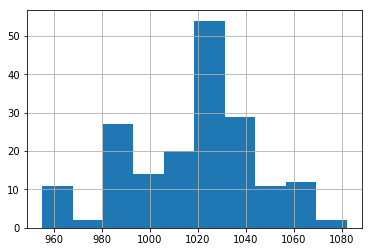

In [72]:
b = s.hist()

In [73]:
from collections import Counter

In [74]:
counter_dict = Counter(slices)

In [88]:
[(tup[0], '{:.1f}kms'.format(GALFA_V_LOOKUP_W[tup[0]]), tup[1]) for tup in counter_dict.most_common(15)]

[(1032, '6.3kms', 8),
 (1023, '-0.4kms', 8),
 (1033, '7.0kms', 6),
 (1022, '-1.1kms', 6),
 (1026, '1.8kms', 5),
 (1031, '5.5kms', 5),
 (1018, '-4.0kms', 5),
 (1019, '-3.3kms', 5),
 (1024, '0.4kms', 4),
 (1027, '2.6kms', 4),
 (1034, '7.7kms', 4),
 (987, '-26.9kms', 4),
 (1028, '3.3kms', 3),
 (1029, '4.0kms', 3),
 (1030, '4.8kms', 3)]

<attribute 'real' of 'int' objects>